## Agenda 
        1 - Análise Exploratória
            Ritual Padrão
            Visão Estatística
            1.1 Tamanho em m2
            1.2 Preço por m²
            1.3 Valores únicos das colunas por Número de Quartos
            1.4 Valores únicos das colunas por Número de Vagas no Estacionamento
            1.5 Valores únicos das colunas por Número de Banheiros
            1.6 Valores únicos das colunas por preço
            Visão com gráficos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('Dados Limpos Apartamentos.csv', index_col = 0)

# Renomeando coluna (tinha esquecido disso no notebook anterior) e reorganizando-as
data.rename(columns={"Bairro": "X_bairro"}, inplace = True)
data = data[['Localização', 'X_bairro', 'X_tamanho_em_m2', 'X_número_de_quartos',
             'X_vagas_para_estacionar', 'X_número_de_banheiros', 'y_preço']]
data.head()

,Localização,X_bairro,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço
0,"Rua General Polidoro, Várzea",Várzea,69,2,1,1,262900
2,"Avenida Santos Dumont, Aflitos",Aflitos,54,2,1,2,450000
3,"Rua Alameda das Hortências, Imbiribeira",Imbiribeira,204,4,3,5,2500000
4,"Rua Cônego Romeu, Boa Viagem",Boa Viagem,70,2,1,2,499000
5,"Rua Professor Augusto Lins e Silva, Boa Viagem",Boa Viagem,74,3,1,3,350000


## 1 - Análise Exploratória

    Ritual Padrão
        Conferir a forma da tabela --------------------- 5 mil dados. Parece ser o suficiente.
        Se há NaN/Null --------------------------------- Não.
        Se os tipos de dados estão adequados para uso -- Aparentemente estão.
        etcétera...
    

In [34]:
data.shape 

(5288, 7)

In [32]:
data.isnull().any()

Localização                False
X_bairro                   False
X_tamanho_em_m2            False
X_número_de_quartos        False
X_vagas_para_estacionar    False
X_número_de_banheiros      False
y_preço                    False
dtype: bool

In [37]:
data.info() # Se bem que aqui já temos acesso a todas aquelas informações ('-' ) mas enfim

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5288 entries, 0 to 6182
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Localização              5288 non-null   object
 1   X_bairro                 5288 non-null   object
 2   X_tamanho_em_m2          5288 non-null   int64 
 3   X_número_de_quartos      5288 non-null   int64 
 4   X_vagas_para_estacionar  5288 non-null   int64 
 5   X_número_de_banheiros    5288 non-null   int64 
 6   y_preço                  5288 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 330.5+ KB


## Visão Estatística

Os valores mínimos e máximos de  X_número_de_quartos - X_vagas_para_estacionar - X_número_de_banheiros<br>
não apresentam nenhuma anormalidade. Já o X_tamanho_em_m2... na verdade, com essa visualização não,<br>
podemos afirmar muito, por isso vamos examiar um pouco mais a fundo essa variável para descobrir, ou não,
possíveis irregularidades.

In [8]:
data.describe()

,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço
count,5288.000000,5288.000000,5288.000000,5288.000000,5.288000e+03
mean,132.604198,3.096067,1.871407,2.780635,6.046006e+05
std,115.244214,0.735132,0.930389,1.085135,5.359886e+05
min,51.000000,2.000000,1.000000,1.000000,4.500000e+03
25%,70.000000,3.000000,1.000000,2.000000,3.175000e+05
50%,103.000000,3.000000,2.000000,3.000000,4.500000e+05
75%,145.000000,4.000000,2.000000,3.000000,6.800000e+05
max,600.000000,4.000000,5.000000,5.000000,2.500000e+06


## Tamanho em m2
A princípio os tamanhos dos apartamentos com relação à quantidade dos dados estão bem distribuídos.<br>
Há muito mais apartamentos de 110m², mas a distribuição da quantia dos outros não é gritante.<br>
Podemos confirmar isso no boxplot logo em seguida.

In [139]:
data.groupby("X_tamanho_em_m2").count().sort_values(['Localização'], ascending=False)

,Localização,X_bairro,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço
X_tamanho_em_m2,,,,,,
110,482,482,482,482,482,482
204,261,261,261,261,261,261
51,256,256,256,256,256,256
74,253,253,253,253,253,253
54,252,252,252,252,252,252
55,250,250,250,250,250,250
180,248,248,248,248,248,248
600,248,248,248,248,248,248
86,244,244,244,244,244,244


Text(0.5, 1.0, 'Quantia de apartamentos (por m²)')

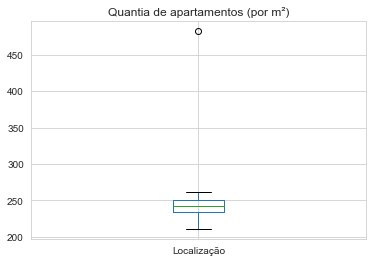

In [3]:
# Os únicos "outliers" são justamente os apês de 110m².

data.groupby("X_tamanho_em_m2").count().boxplot('Localização')
plt.title("Quantia de apartamentos (por m²)")

A maior parte dos apartamentos têm entre 50 e 100m². E boa parte dos dados estão concentrados entre 50 a 200m². O que é normal, já a maioria das pessoas não costuma comprar apartamentos com valores altissímos de m², logo, suas ocorrências/construções estarão em menor número.

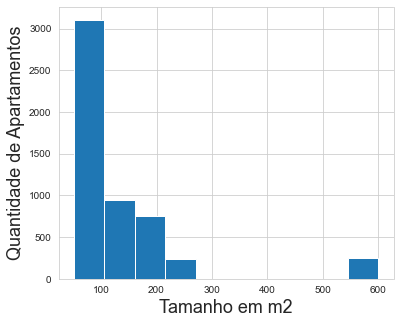

In [141]:
plt.figure(figsize=(6,5))
data.X_tamanho_em_m2.hist()
plt.xlabel("Tamanho em m2", fontsize=18)
plt.ylabel("Quantidade de Apartamentos", fontsize=18)
plt.show()

## 1.2 Preço por m²

Perceba que há um outlier entre os preços. Apartamentos que custam 4500 reais?<br>
Ao plotar um gráfico de dispersão observamos que esse valor ocorre em apartamentos<br>
de 600m², o que é de se estranhar.

In [179]:
data.y_preço.unique()

array([ 262900,  450000, 2500000,  499000,  350000,  480000,  280000,
        750000,  320000,  245000,    4500,  680000,  250000,  317500,
        585000,  760000,  530000,  700000,  620000, 1700000], dtype=int64)

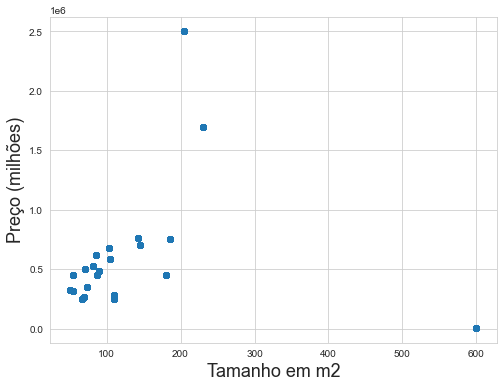

In [151]:
plt.figure(figsize=(8,6))
plt.scatter(data.X_tamanho_em_m2, data.y_preço)
plt.xlabel("Tamanho em m2", fontsize=18)
plt.ylabel("Preço (milhões)", fontsize=18)
plt.show()

In [183]:
data[data.X_tamanho_em_m2 == 600].head()

,Localização,X_bairro,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço
11,"Avenida Conselheiro Rosa e Silva, Espinheiro",Espinheiro,600,3,5,1,4500
33,"Rua Cândido Lacerda, Torreão",Torreão,600,3,5,1,4500
55,"Travessa Augusto Rodrigues, Encruzilhada",Encruzilhada,600,3,5,1,4500
76,"Rua do Giriquiti, Boa Vista",Boa Vista,600,3,5,1,4500
98,"Rua Setúbal, Boa Viagem",Boa Viagem,600,3,5,1,4500


**Outra bizarrice é o fato de haver apenas o mesmo valor em todas as colunas numéricas.**<br>
Sem contar a quantidade de banheiro ser apenas 1 para um imóvel de 600m².<br>
Provavelmente irei excluí-los. Por parecerem ser dados incorretos (talvez por erro meu em algum momento, se for o caso, acredito que possa ter ocorrido na coleta dos dados/web scraping).

In [184]:
data.X_número_de_quartos[data.X_tamanho_em_m2 == 600].unique()

array([3], dtype=int64)

In [185]:
data.X_vagas_para_estacionar[data.X_tamanho_em_m2 == 600].unique()

array([5], dtype=int64)

In [186]:
data.X_número_de_banheiros[data.X_tamanho_em_m2 == 600].unique()

array([1], dtype=int64)

In [182]:
data.X_bairro[data.X_tamanho_em_m2 == 600].unique()

array(['Espinheiro', 'Torreão', 'Encruzilhada', 'Boa Vista', 'Boa Viagem',
       'Santo Amaro', 'Torrões', 'Madalena', 'Caxangá', 'Casa Amarela',
       'Várzea', 'Iputinga', 'Tamarineira', 'Casa Forte', 'Pina',
       'Rosarinho', 'Ilha do Retiro', 'Afogados', 'Cordeiro', 'Aflitos',
       'Graças', 'Torre', 'Vasco da Gama', 'Parnamirim',
       'Jardim São Paulo', 'Engenho do Meio', 'Campo Grande', 'Monteiro',
       'Imbiribeira', 'Prado', 'Agua Fria', 'San Martin', 'Derby'],
      dtype=object)

**Outros dois pontos que me chamaram a atenção foram os imóveis de m² menor mas com valores bem mais altos.**<br>
Ao que parece suas outras características compensam seus tamanhos (que já são grandes).

In [246]:
data[data.y_preço == 1700000].head()

,Localização,X_bairro,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço
45,"Rua Ministro Nelson Hungria, Boa Viagem",Boa Viagem,230,4,2,5,1700000
66,"Rua Desembargador João Paes, Boa Viagem",Boa Viagem,230,4,2,5,1700000
110,"Rua das Creoulas, Graças",Graças,230,4,2,5,1700000
174,"Rua João Arruda Marinho, Boa Viagem",Boa Viagem,230,4,2,5,1700000
195,"Rua Isaac Markman, Bongi",Bongi,230,4,2,5,1700000


In [249]:
len(data[data.y_preço == 1700000])

236

In [247]:
data[data.y_preço == 2500000].head()

,Localização,X_bairro,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço
3,"Rua Alameda das Hortências, Imbiribeira",Imbiribeira,204,4,3,5,2500000
25,"Rua Ministro Nelson Hungria, Boa Viagem",Boa Viagem,204,4,3,5,2500000
47,"Rua das Creoulas, Graças",Graças,204,4,3,5,2500000
68,"Rua Visconde de Goiana, Boa Vista",Boa Vista,204,4,3,5,2500000
90,"Avenida Boa Viagem, Pina",Pina,204,4,3,5,2500000


In [4]:
len(data[data.y_preço == 2500000])

261

**Antes de continuar as observações. Vamos eliminar os imóveis com 600m²**

In [270]:
len(data[data.X_tamanho_em_m2 != 600]) # Ficaremos com 5040 dados

5040

In [5]:
data = data[data.X_tamanho_em_m2 != 600]

Para facilitar minha análise resolvi tentar identificar anomalias análisando as relações entre os valores únicos de cada variável de acordo com as colunas.

    Exemplo: os imóveis de 2 quartos aparecem em imóveis que têm 69, 54, 70, 51 ou 55m²
    e 1 ou 2 banheiros. O que é normal, já que esse espaço é capaz de receber tais quantidades
    de cômodos.
    
    Porém, se um imóvel com 2 quartos apresentar 5 banheiros... é um elemento a se buscar explicações...
    
E aparentemente não há mais excentricidade. lembrando que talvez tenha deixado passar alguma por minha falta de conhecimentos específicos da área.

## Valores únicos das colunas por Número de Quartos

In [51]:
for room in data.X_número_de_quartos.unique():
    print("\nPara", room, "quartos .unique() é:")
    print("X_tamanho_em_m2:         ", data.X_tamanho_em_m2[data.X_número_de_quartos == room].unique())
    print("X_vagas_para_estacionar: ", data.X_vagas_para_estacionar[data.X_número_de_quartos == room].unique())
    print("X_número_de_banheiros:   ", data.X_número_de_banheiros[data.X_número_de_quartos == room].unique())
    print("y_preço:                 ", data.y_preço[data.X_número_de_quartos == room].unique())
    print("Número de X_bairro:      ", len(data.X_bairro[data.X_número_de_quartos == room].unique()))  
    print("Número de observações:   ",len(data[data.X_número_de_quartos == room]))
    print("-"*40) 


Para 2 quartos .unique() é:
X_tamanho_em_m2:          [69 54 70 51 55]
X_vagas_para_estacionar:  [1]
X_número_de_banheiros:    [1 2]
y_preço:                  [262900 450000 499000 320000 317500]
Número de X_bairro:       50
Número de observações:    1199
----------------------------------------

Para 4 quartos .unique() é:
X_tamanho_em_m2:          [204 110 186 103 180 145 230]
X_vagas_para_estacionar:  [3 2]
X_número_de_banheiros:    [5 3 4 2]
y_preço:                  [2500000  280000  750000  680000  450000  700000 1700000]
Número de X_bairro:       59
Número de observações:    1707
----------------------------------------

Para 3 quartos .unique() é:
X_tamanho_em_m2:          [ 74  89  66 110 104  87 142  82  86]
X_vagas_para_estacionar:  [1 2]
X_número_de_banheiros:    [3 2 4]
y_preço:                  [350000 480000 245000 250000 585000 450000 760000 530000 620000]
Número de X_bairro:       60
Número de observações:    2134
----------------------------------------


## Valores únicos das colunas por Número de Vagas no Estacionamento

In [52]:
for parking_lot in data.X_vagas_para_estacionar.unique():
    print("\nPara", parking_lot, "vagas no estacionamento .unique() é:")
    print("X_tamanho_em_m2:         ", data.X_tamanho_em_m2[data.X_vagas_para_estacionar == parking_lot].unique())
    print("X_número_de_quartos:     ", data.X_número_de_quartos[data.X_vagas_para_estacionar == parking_lot].unique())
    print("X_número_de_banheiros:   ", data.X_número_de_banheiros[data.X_vagas_para_estacionar == parking_lot].unique())
    print("y_preço:                 ", data.y_preço[data.X_vagas_para_estacionar == parking_lot].unique())
    print("Número de X_bairro:      ", len(data.X_bairro[data.X_vagas_para_estacionar == parking_lot].unique()))  
    print("Número de observações:   ",len(data[data.X_vagas_para_estacionar == parking_lot]))
    print("-"*40) 


Para 1 vagas no estacionamento .unique() é:
X_tamanho_em_m2:          [ 69  54  70  74  51  66 110  55]
X_número_de_quartos:      [2 3]
X_número_de_banheiros:    [1 2 3]
y_preço:                  [262900 450000 499000 350000 320000 245000 250000 317500]
Número de X_bairro:       58
Número de observações:    1928
----------------------------------------

Para 3 vagas no estacionamento .unique() é:
X_tamanho_em_m2:          [204 186]
X_número_de_quartos:      [4]
X_número_de_banheiros:    [5 4]
y_preço:                  [2500000  750000]
Número de X_bairro:       40
Número de observações:    504
----------------------------------------

Para 2 vagas no estacionamento .unique() é:
X_tamanho_em_m2:          [ 89 110 103 180 104  87 142  82 145  86 230]
X_número_de_quartos:      [3 4]
X_número_de_banheiros:    [3 2 4 5]
y_preço:                  [ 480000  280000  680000  450000  585000  760000  530000  700000  620000
 1700000]
Número de X_bairro:       63
Número de observações:    2608
---

## Valores únicos das colunas por Número de Banheiros

In [53]:
for bathroom in data.X_número_de_banheiros.unique():
    print("\nPara", bathroom, "banheiros .unique() é:")
    print("X_tamanho_em_m2:         ", data.X_tamanho_em_m2[data.X_número_de_banheiros == bathroom].unique())
    print("X_número_de_quartos:     ", data.X_número_de_quartos[data.X_número_de_banheiros == bathroom].unique())
    print("X_vagas_para_estacionar: ", data.X_vagas_para_estacionar[data.X_número_de_banheiros == bathroom].unique())
    print("y_preço:                 ", data.y_preço[data.X_número_de_banheiros == bathroom].unique())
    print("Número de X_bairro:      ", len(data.X_bairro[data.X_número_de_banheiros == bathroom].unique()))
    print("Número de observações:   ",len(data[data.X_número_de_banheiros == bathroom]))

    print("-"*40) 


Para 1 banheiros .unique() é:
X_tamanho_em_m2:          [69]
X_número_de_quartos:      [2]
X_vagas_para_estacionar:  [1]
y_preço:                  [262900]
Número de X_bairro:       31
Número de observações:    211
----------------------------------------

Para 2 banheiros .unique() é:
X_tamanho_em_m2:          [ 54  70  51  66 180 110  55  82]
X_número_de_quartos:      [2 3 4]
X_vagas_para_estacionar:  [1 2]
y_preço:                  [450000 499000 320000 245000 250000 317500 530000]
Número de X_bairro:       57
Número de observações:    1946
----------------------------------------

Para 5 banheiros .unique() é:
X_tamanho_em_m2:          [204 230]
X_número_de_quartos:      [4]
X_vagas_para_estacionar:  [3 2]
y_preço:                  [2500000 1700000]
Número de X_bairro:       47
Número de observações:    497
----------------------------------------

Para 3 banheiros .unique() é:
X_tamanho_em_m2:          [ 74  89 110 103 104  87  86]
X_número_de_quartos:      [3 4]
X_vagas_para_est

## Valores únicos das colunas por preço

Esperava encontrar mais variedades, mas pelo que vejo apenas imóveis com preço de R$450000 variam em número de quartos, banheiros... é como se todos os outros dados fossem duplicatas. Neste ponto se fortalece a ideia de que ou cometi algum erro durante o processo de coleta e organização dos dados ou obtive dados de imóveis bem semelhantes da cidade do Recife. Padrão da área? 

ps: o mesmo acontece para esse processo com o m², pouca variedade.

In [284]:
for price in data.y_preço.unique():
    print("\nPara o valor de", price,".unique() é:")
    print("X_tamanho_em_m2:         ", data.X_tamanho_em_m2[data.y_preço == price].unique())
    print("X_número_de_quartos:     ", data.X_número_de_quartos[data.y_preço == price].unique())
    print("X_vagas_para_estacionar: ", data.X_vagas_para_estacionar[data.y_preço == price].unique())
    print("X_número_de_banheiros:   ", data.X_número_de_banheiros[data.y_preço == price].unique())
    print("Número de X_bairro:      ", len(data.X_bairro[data.y_preço == price].unique()))
    print("Número de observações:   ",len(data[data.y_preço == price]))

    print("-"*40) 


Para o valor de 262900 .unique() é:
X_tamanho_em_m2:          [69]
X_número_de_quartos:      [2]
X_vagas_para_estacionar:  [1]
X_número_de_banheiros:    [1]
Número de X_bairro:       31
Número de observações:    211
----------------------------------------

Para o valor de 450000 .unique() é:
X_tamanho_em_m2:          [ 54 180  87]
X_número_de_quartos:      [2 4 3]
X_vagas_para_estacionar:  [1 2]
X_número_de_banheiros:    [2 3]
Número de X_bairro:       52
Número de observações:    742
----------------------------------------

Para o valor de 2500000 .unique() é:
X_tamanho_em_m2:          [204]
X_número_de_quartos:      [4]
X_vagas_para_estacionar:  [3]
X_número_de_banheiros:    [5]
Número de X_bairro:       36
Número de observações:    261
----------------------------------------

Para o valor de 499000 .unique() é:
X_tamanho_em_m2:          [70]
X_número_de_quartos:      [2]
X_vagas_para_estacionar:  [1]
X_número_de_banheiros:    [2]
Número de X_bairro:       36
Número de observaçõe

## Visão com gráficos

Como vemos, tudo parece ser anormalmente normal... imóveis com maior m² apresentam maior número de quartos e banheiros, mas há exceções. No gráfico vemos imóveis com aproximadamente 140m² com 4 quartos, mas também outros com aproximadamente 110m² também com 4 quartos. Não que seja um problema, apenas uma observação.

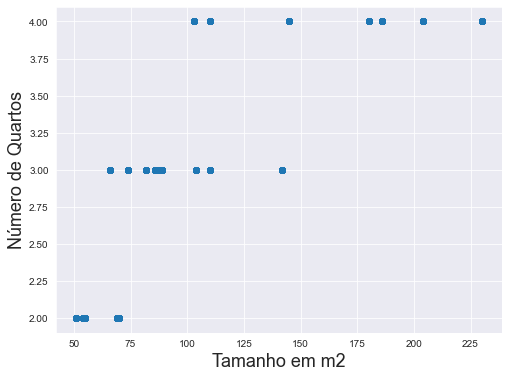

In [54]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
plt.scatter(data.X_tamanho_em_m2, data.X_número_de_quartos)
plt.xlabel("Tamanho em m2", fontsize=18)
plt.ylabel("Número de Quartos", fontsize=18)
plt.show()

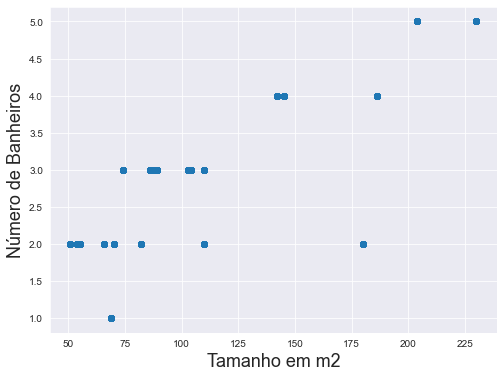

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(data.X_tamanho_em_m2, data.X_número_de_banheiros)
plt.xlabel("Tamanho em m2", fontsize=18)
plt.ylabel("Número de Banheiros", fontsize=18)
plt.show()

O mesmo gráfico de m² por preço que levantou várias dúvidas, mas agora sem o outlier de 600m²

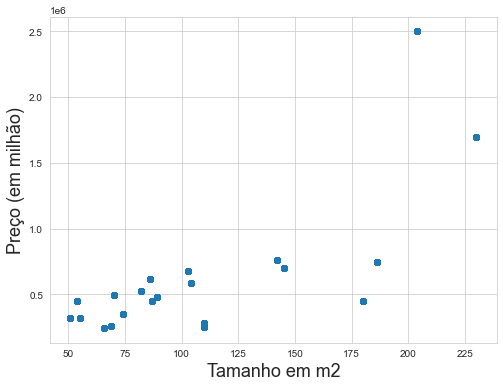

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(data.X_tamanho_em_m2, data.y_preço)
plt.xlabel("Tamanho em m2", fontsize=18)
plt.ylabel("Preço (em milhão)", fontsize=18)
plt.show()

In [ ]:
data.to_csv("Dados para modelar.csv.csv")

Mesmo com dúvida no coração, vamos partir para a modelagem dos dados. E a medida que os "fantasmas do passado" forem aparecendo para nos assombrar, vamos voltando os processos para enfrentá-los.